### Test
Testing the noteboook

In [23]:
%matplotlib inline

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import affine_transform

In [25]:
# Replace 'path/to/your_shapefile.shp' with the actual path to your shapefile
geojson_path = '2024-01-24_siedlce_2180.geojson'

# Siedlce OSM: '2024-01-24_siedlce_2180.geojson'
# Siedlce ELEMENTY SIECIOWE: '2024-01-24_elem-siec_isa.geojson'
# Siedlce EIK: '2024-01-31_siedlce_EIK_2180.geojson'
# Warka:
#Skierniewice:


In [26]:
# Read the shapefile
gdf = gpd.read_file(geojson_path)

In [27]:
# Explore the GeoDataFrame
print(gdf.head())

       osm_id  code fclass  name  layer bridge tunnel  \
0  1237083965  6101   rail  None      0      F      F   
1  1237083966  6101   rail  None      0      F      F   
2   981055673  6101   rail  None      0      F      F   
3   981055673  6101   rail  None      0      F      F   
4   269879427  6101   rail  None      0      F      F   

                                            geometry  
0  MULTILINESTRING ((722590.669 483149.450, 72261...  
1  MULTILINESTRING ((722588.225 483146.077, 72260...  
2  MULTILINESTRING ((725481.371 480928.403, 72549...  
3  MULTILINESTRING ((725471.208 480941.396, 72548...  
4  MULTILINESTRING ((725445.166 480870.111, 72542...  


<Axes: >

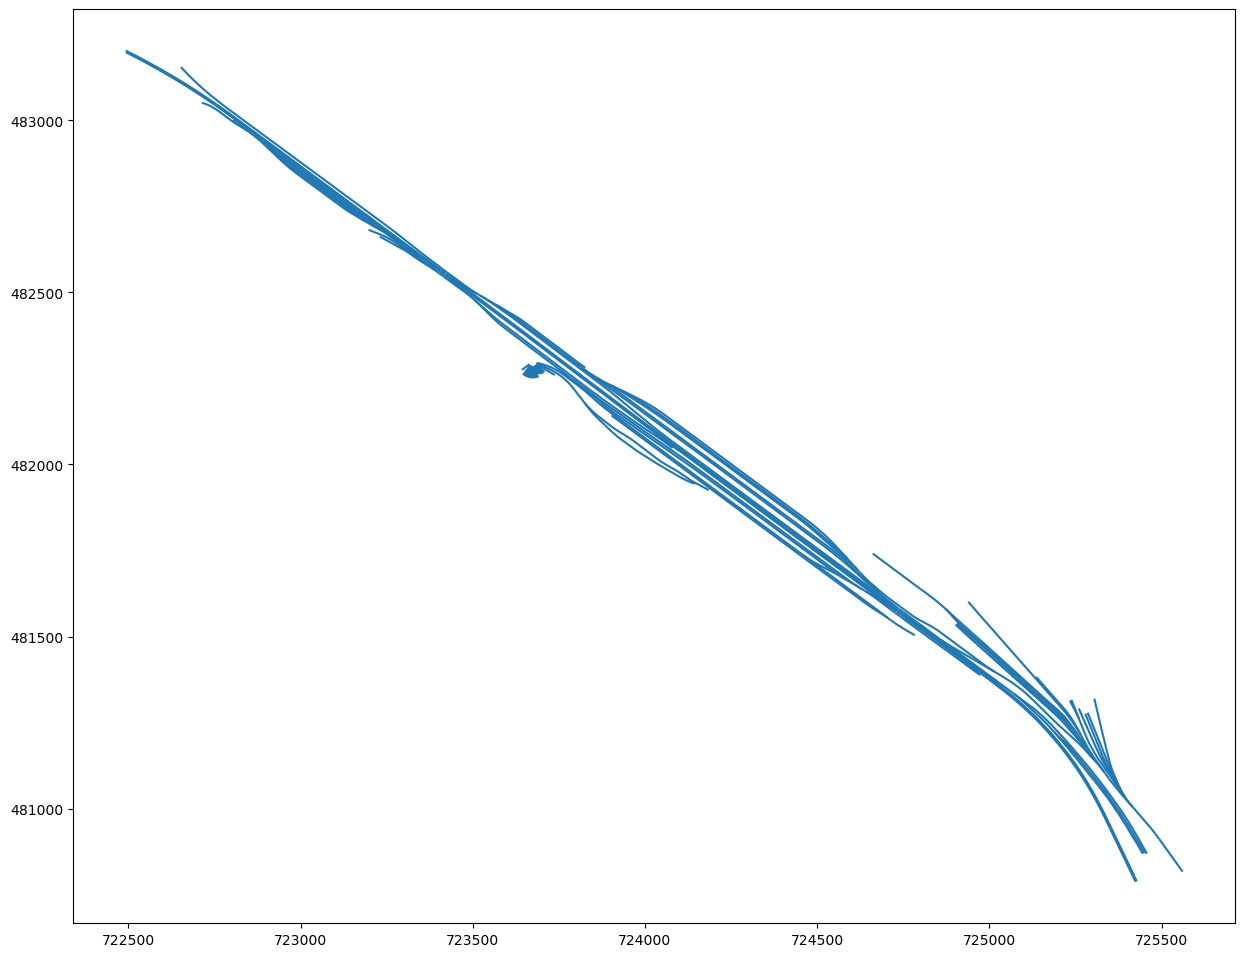

In [28]:
# Visualize the data
gdf.plot(figsize=(15, 15))

In [29]:
rotate_angle = 38

#Siedlce: 38

In [30]:
df_rotated2 = gdf.rotate(rotate_angle, origin=gdf.unary_union.centroid)

<Axes: >

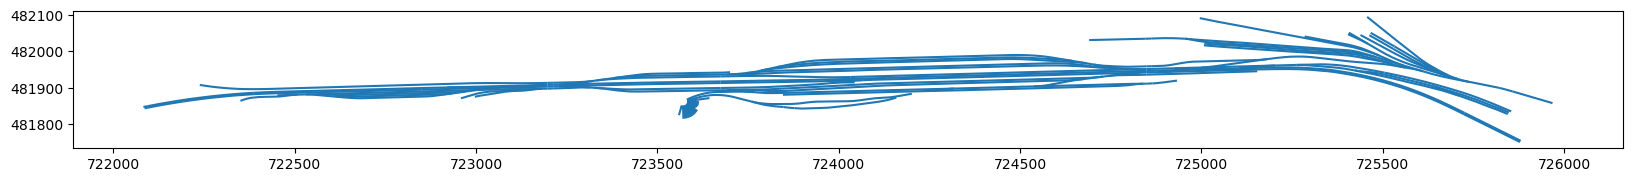

In [31]:
df_rotated2.plot(figsize=(20, 20))

In [32]:
# Explore the GeoDataFrame
print(gdf.head())

       osm_id  code fclass  name  layer bridge tunnel  \
0  1237083965  6101   rail  None      0      F      F   
1  1237083966  6101   rail  None      0      F      F   
2   981055673  6101   rail  None      0      F      F   
3   981055673  6101   rail  None      0      F      F   
4   269879427  6101   rail  None      0      F      F   

                                            geometry  
0  MULTILINESTRING ((722590.669 483149.450, 72261...  
1  MULTILINESTRING ((722588.225 483146.077, 72260...  
2  MULTILINESTRING ((725481.371 480928.403, 72549...  
3  MULTILINESTRING ((725471.208 480941.396, 72548...  
4  MULTILINESTRING ((725445.166 480870.111, 72542...  


In [33]:
# Explore the GeoDataFrame
print(df_rotated2.head())

0    MULTILINESTRING ((722191.912 481865.886, 72221...
1    MULTILINESTRING ((722192.063 481861.723, 72221...
2    MULTILINESTRING ((725837.229 481895.371, 72585...
3    MULTILINESTRING ((725821.222 481899.353, 72583...
4    MULTILINESTRING ((725844.588 481827.146, 72581...
dtype: geometry


In [34]:
# TO DELETE

# Save the GeoDataFrame as a GeoJSON file
df_rotated2.to_file('2024-01-24_elem-siec_isa_rotated.geojson', driver='GeoJSON')

In [35]:
#
TO DELETE
geojson_path = '2024-01-24_elem-siec_isa_rotated.geojson'

In [36]:
# Wczytaj plik GeoJSON
gdf = gpd.read_file(geojson_path)

In [37]:
# Oblicz minimalne współrzędne (xmin, ymin) dla każdego z geometrii
min_coords = gdf.bounds.min()

In [38]:
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf['geometry'] = gdf.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [39]:
# Explore the GeoDataFrame
print(gdf.head())

                                            geometry
0  MULTILINESTRING ((109.328 115.847, 132.377 119...
1  MULTILINESTRING ((109.479 111.685, 133.999 115...
2  MULTILINESTRING ((3754.645 145.333, 3774.631 1...
3  MULTILINESTRING ((3738.638 149.314, 3754.645 1...
4  MULTILINESTRING ((3762.004 77.107, 3729.360 90...


<Axes: >

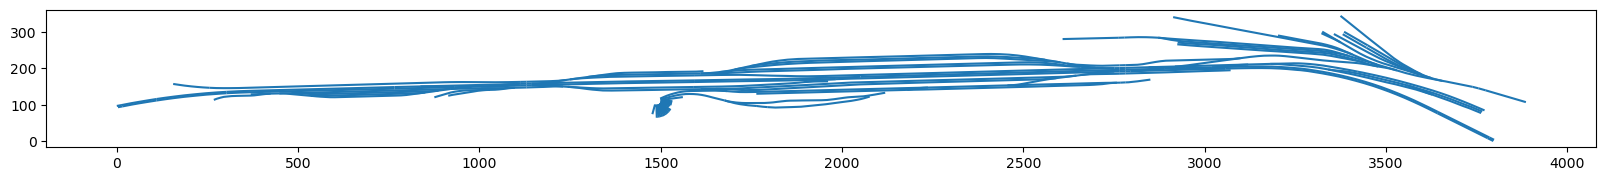

In [40]:
gdf.plot(figsize=(20, 20))

In [41]:
# Function to scale the x-coordinates by a factor
def scale_x(geometry, factor):
    return affine_transform(geometry, [factor, 0, 0, 1, 0, 0])

In [42]:
# Apply the scaling operation to the geometry column
gdf['geometry'] = gdf['geometry'].apply(scale_x, factor=1/4)

In [43]:
# Explore the GeoDataFrame
print(gdf.head())

                                            geometry
0  MULTILINESTRING ((27.332 115.847, 33.094 119.1...
1  MULTILINESTRING ((27.370 111.685, 33.500 115.2...
2  MULTILINESTRING ((938.661 145.333, 943.658 139...
3  MULTILINESTRING ((934.659 149.314, 938.661 145...
4  MULTILINESTRING ((940.501 77.107, 932.340 90.4...


In [44]:
df_rotated3 = gdf.rotate(-5, origin=gdf.unary_union.centroid)

<Axes: >

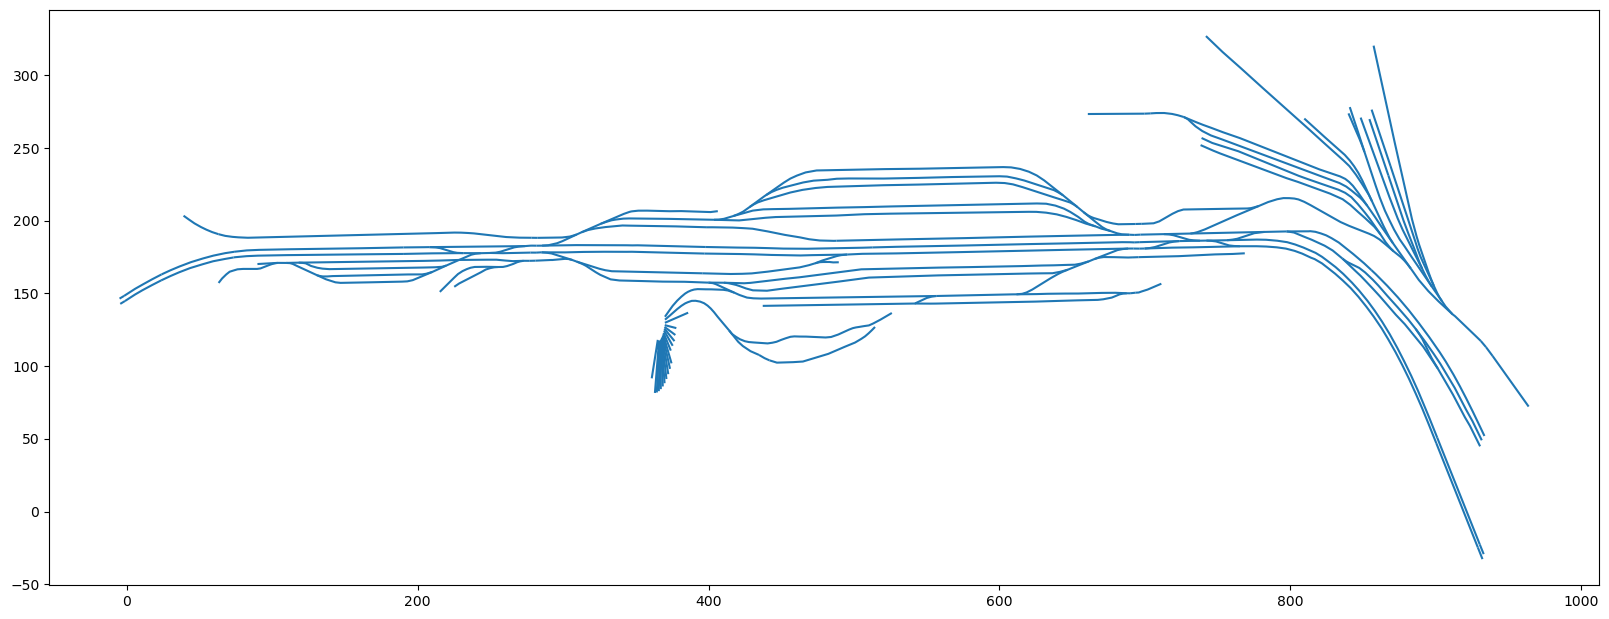

In [45]:
df_rotated3.plot(figsize=(20, 20))

In [46]:
print(df_rotated3.head())

0    MULTILINESTRING ((24.042 163.069, 30.070 165.8...
1    MULTILINESTRING ((23.717 158.919, 30.133 161.9...
2    MULTILINESTRING ((934.473 113.015, 938.961 106...
3    MULTILINESTRING ((930.834 117.329, 934.473 113...
4    MULTILINESTRING ((930.360 44.889, 923.397 58.9...
dtype: geometry


In [47]:
# Save the GeoDataFrame as a GeoJSON file
df_rotated3.to_file('2024-01-24_elem-siec_isa_rotated.geojson', driver='GeoJSON')

In [48]:
import geopandas as gpd
from shapely.geometry import mapping
import xml.etree.ElementTree as ET
from xml.dom import minidom


# RailML XML namespace
railml_ns = {"railml": "http://www.railml.org/schemas/2013"}

# Create RailML XML document
railml_root = ET.Element("railml", nsmap=railml_ns)

# Iterate through GeoDataFrame features
for index, row in gdf.iterrows():
    # Extract geometry from GeoDataFrame
    geometry = row['geometry']

    # Convert Shapely geometry to GeoJSON-like dictionary
    geometry_dict = mapping(geometry)

    # Create RailML track element
    track_element = ET.SubElement(railml_root, "track", nsmap=railml_ns)

    # Create RailML geometry element
    geometry_element = ET.SubElement(track_element, "geometry", nsmap=railml_ns)

    # Add RailML point elements based on GeoJSON-like geometry
    for coord in geometry_dict['coordinates']:
        point_element = ET.SubElement(geometry_element, "point", nsmap=railml_ns)
        point_element.set("x", str(coord[0]))
        point_element.set("y", str(coord[1]))
        # Add additional attributes as needed

# Create a formatted XML string
xml_string = ET.tostring(railml_root, encoding='utf-8')
xml_pretty_string = minidom.parseString(xml_string).toprettyxml(indent="  ")

# Save or print the RailML XML
with open("output_railml.xml", "w") as xml_file:
    xml_file.write(xml_pretty_string)


In [49]:
# Save the RailML XML to a file
output_file_path = "output_railml.xml"
with open(output_file_path, "w") as xml_file:
    xml_file.write(xml_pretty_string)

# Print a message indicating where the XML is saved
print(f"RailML XML saved to: {output_file_path}")

RailML XML saved to: output_railml.xml
